In [71]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [72]:
df_eth = pd.read_csv('ETH_2017-2024.csv', parse_dates=True)

df_sol = pd.read_csv('SOL_2022-2024.csv', parse_dates=True)





In [73]:
df_eth.head(5)

,Date,Closing Price,Volume
0,2017-11-09,320.884003,893249984
1,2017-11-10,299.252991,885985984
2,2017-11-11,314.681000,842300992
3,2017-11-12,307.907990,1613479936
4,2017-11-13,316.716003,1041889984


In [74]:
df_eth.tail(5)

,Date,Closing Price,Volume
2695,2025-03-27,2002.357422,11593274543
2696,2025-03-28,1895.502930,18160526498
2697,2025-03-29,1827.320312,12194771785
2698,2025-03-30,1806.218628,9854857162
2699,2025-03-31,1823.479980,15765030938


In [75]:
df_sol.head(5)

,Date,Closing Price,Volume
0,2022-01-01,178.517944,1084780603
1,2022-01-02,176.382843,995389409
2,2022-01-03,170.297745,1345778058
3,2022-01-04,167.938904,1499265336
4,2022-01-05,155.099731,2123759721


In [76]:
df_sol.tail(5)

,Date,Closing Price,Volume
725,2023-12-27,107.023796,4267938569
726,2023-12-28,102.104568,4492625126
727,2023-12-29,106.311516,4445797973
728,2023-12-30,101.845085,1863177830
729,2023-12-31,101.505821,1748630533


In [77]:
# https://www.youtube.com/watch?v=tMv74JmjZ_Y

df = pd.merge(df_eth, df_sol, how = 'inner', left_on=['Date'], right_on = ['Date'])

df.head()



,Date,Closing Price_x,Volume_x,Closing Price_y,Volume_y
0,2022-01-01,3769.697021,9776191466,178.517944,1084780603
1,2022-01-02,3829.564941,9881471548,176.382843,995389409
2,2022-01-03,3761.380371,12080777893,170.297745,1345778058
3,2022-01-04,3794.056641,14030925983,167.938904,1499265336
4,2022-01-05,3550.386963,18061338502,155.099731,2123759721


In [78]:
# https://pandas.pydata.org/docs/user_guide/basics.html#basics-rename

df = df.rename(columns={'Closing Price_x' : 'ETH_Price', 'Closing Price_y' : 'SOL_Price'})

df = df.drop('Volume_x', axis = 1)
df = df.drop('Volume_y', axis = 1)

df.head()

,Date,ETH_Price,SOL_Price
0,2022-01-01,3769.697021,178.517944
1,2022-01-02,3829.564941,176.382843
2,2022-01-03,3761.380371,170.297745
3,2022-01-04,3794.056641,167.938904
4,2022-01-05,3550.386963,155.099731


In [79]:
df.isna().sum()

Date         0
ETH_Price    0
SOL_Price    0
dtype: int64

In [80]:
from numpy.lib.stride_tricks import sliding_window_view

timestep_size = 50

closing_price = df['ETH_Price'].values
volume = df['SOL_Price'].values

closing_price_windows = sliding_window_view(closing_price, window_shape=timestep_size)
volume_windows = sliding_window_view(volume, window_shape=timestep_size)

X = np.vstack((closing_price_windows, volume_windows))

y = np.array([0] * len(closing_price_windows) + [1] * len(volume_windows))

print("X:", X.shape)
print("y:", y.shape)

X: (1362, 50)
y: (1362,)


In [81]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

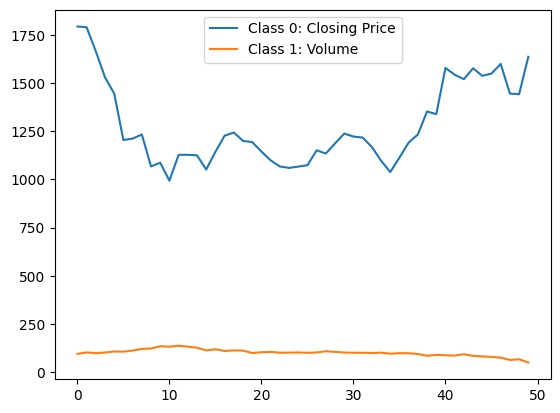

In [82]:
test_signal_index = 166

c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: Closing Price")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: Volume")
plt.legend()

In [83]:
train_size = 0.7
splitter = int(len(X) * train_size)

x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [84]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

953
409
953
409


In [85]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [86]:
x_train

array([[[2573.81616211],
        [2639.29931641],
        [2590.35961914],
        ...,
        [3261.91625977],
        [3211.86694336],
        [2981.05224609]],

       [[  23.25608826],
        [  22.69258881],
        [  21.91638756],
        ...,
        [  24.77272224],
        [  24.07937813],
        [  25.36192703]],

       [[  19.02328682],
        [  19.13002205],
        [  19.95761681],
        ...,
        [  56.15409851],
        [  51.90705109],
        [  56.83837509]],

       ...,

       [[  22.79361916],
        [  22.63220406],
        [  23.18569565],
        ...,
        [  20.30493736],
        [  19.47907066],
        [  19.43814468]],

       [[1629.65527344],
        [1633.62939453],
        [1632.25231934],
        ...,
        [1629.30444336],
        [1663.42993164],
        [1765.38269043]],

       [[  21.39106941],
        [  21.92725372],
        [  21.28301239],
        ...,
        [  15.65610123],
        [  15.5587759 ],
        [  15.19670773]]

In [87]:
class_names = np.array(['ETH_Price', 'SOL_Price'])
num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    model = keras.Sequential(
        [
            keras.layers.Input(input_shape),


            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),


            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            keras.layers.Dense(64, activation="relu"),

            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )

    return model


model = make_model(input_shape=x_train.shape[1:])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 50, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,802 (18.76 KB)

 Trainable params: 4,674 (18.26 KB)

 Non-trainable params: 128 (512.00 B)

In [88]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model2.keras", save_best_only=True, monitor="val_loss"
    )
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2382 - sparse_categorical_accuracy: 0.9226 - val_loss: 0.1159 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0417 - sparse_categorical_accuracy: 0.9974 - val_loss: 0.0281 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0102 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0052 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0026 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_sparse_categorical_accuracy: 1.0000
Epoch 7/5

<Axes: >

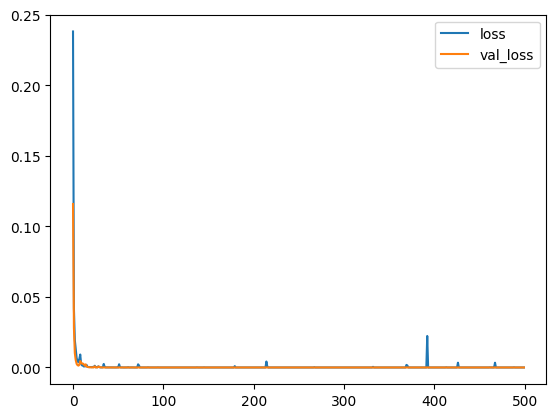

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

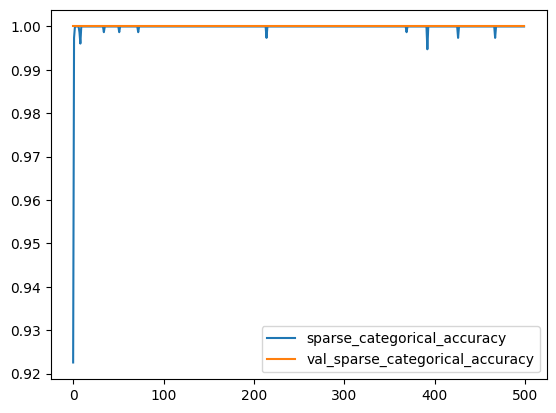

In [90]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

In [91]:
model = keras.models.load_model("best_model2.keras")

In [92]:
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[0.0, 1.0]

Train data evaluation:
[0.0, 1.0]


In [93]:
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<Axes: >

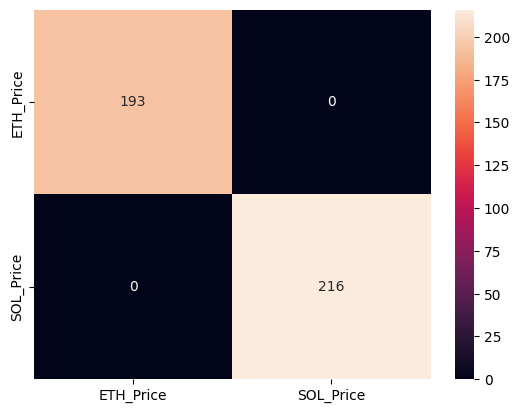

In [94]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

In [95]:
print(classification_report(y_test, test_predictions, target_names=class_names))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

   ETH_Price       1.00      1.00      1.00       193
   SOL_Price       1.00      1.00      1.00       216

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409


Model overall accuracy: 100.00%


In [96]:
# Code for generating synthetic test data was generated with AI

synthetic_price = np.random.normal(0, 1, 50)
synthetic_volume = np.random.normal(0, 1, 50)
synthetic_sample = np.vstack([synthetic_price, synthetic_volume]).T
synthetic_sample = synthetic_sample.reshape(1, synthetic_sample.shape[0], synthetic_sample.shape[1])


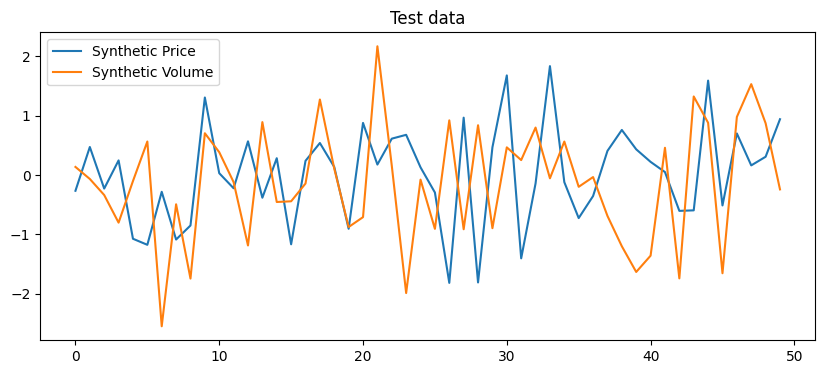

In [97]:


plt.figure(figsize=(10,4))
plt.plot(synthetic_price, label='Synthetic Price')
plt.plot(synthetic_volume, label='Synthetic Volume')
plt.legend()
plt.title('Test data')
plt.show()


In [98]:


synthetic_pred = model.predict(synthetic_sample)
predicted_class = np.argmax(synthetic_pred, axis=-1)
print(f"Predicted Class: {predicted_class}")
print(f"Output: {synthetic_pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Class: [1]
Output: [[4.9873833e-10 1.0000000e+00]]
